Clasificación del Fashion MNIST dataset
===

* *30 min* | Última modificación: Julio 09, 2019

Basado en: https://www.tensorflow.org/tutorials/keras/basic_classification?hl=es

![assets/fashion-mnist-sprite.png](assets/fashion-mnist-sprite.png)

## Preparación

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.0.0-beta1


## Dataset

In [2]:
##
## Descarga de los datos
##
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
##
## Nombres de las clases
##
class_names = [      # label
    'T-shirt/top',   # 0
    'Trouser',       # 1
    'Pullover',      # 2
    'Dress',         # 3
    'Coat',          # 4
    'Sandal',        # 5
    'Shirt',         # 6
    'Sneaker',       # 7
    'Bag',           # 8
    'Ankle boot']    # 9

## Exploración de los datos

In [4]:
##
## Cantidad de patrones de entrenamiento
##
print(train_images.shape, 
      '\n',
      len(train_labels))

(60000, 28, 28) 
 60000


In [5]:
##
## Cantidad de patrones de prueba
##
print(test_images.shape, 
      '\n', 
      len(test_labels))

(10000, 28, 28) 
 10000


## Preprocesamiento

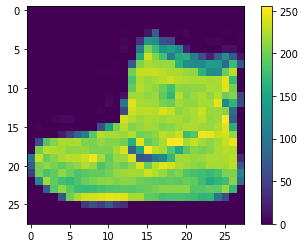

In [6]:
##
## Las figuras son de 28x28 pixels, y el
## color va entre 0 y 255
##
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
##
## Normalización del color al rango [0, 1]
##
train_images = train_images / 255.0
test_images = test_images / 255.0

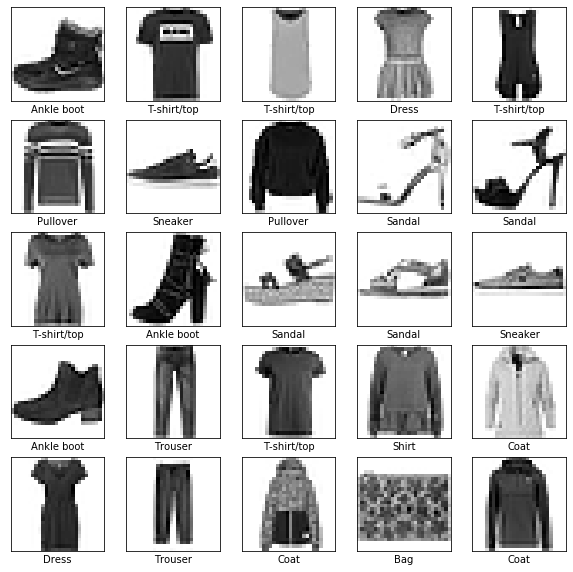

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construcción del modelo

### Configuración de las capas

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compilación

In [10]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

## Entrenamiento

In [11]:
model.fit(
    train_images, 
    train_labels, 
    epochs=5);

W0709 14:05:45.308636 139789610583872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4975 - accuracy: 0.8252
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3747 - accuracy: 0.8652
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3355 - accuracy: 0.8775
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3108 - accuracy: 0.8857
Epoch 5/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2915 - accuracy: 0.8921


## Evaluación de la precisión

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3666 - accuracy: 0.8742
Test accuracy: 0.8742


## Pronóstico

### Pronóstico para todo el conjunto de prueba

In [13]:
##
## Realiza la predicción para el conjunto de test
##
predictions = model.predict(test_images)

In [14]:
##
## Valores asignados a cada una de las clases 
## pra el primer ejemplo
##
predictions[0]

array([5.63242111e-06, 4.64350506e-07, 8.01351143e-06, 2.80851054e-07,
       1.03667926e-05, 1.23891346e-01, 2.48278848e-05, 2.67038886e-02,
       4.60173715e-06, 8.49350631e-01], dtype=float32)

In [15]:
##
## Suma de los valores asignados a cada clase.
## Puede asimilarse a probabilidad.
##
sum(predictions[0])

1.0000000534926414

In [16]:
##
## Label para el que se produce el valor más alto
##
np.argmax(predictions[0])

9

In [17]:
##
## Grafica la imagen
##
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100*np.max(predictions_array),
            class_names[true_label]), 
        color=color)    

In [18]:
##
## Grafica un diagrama de barras con la probabilidad 
## asignada a cada label
##
def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

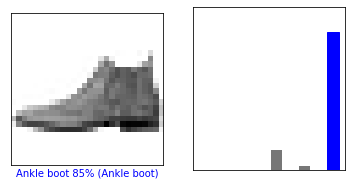

In [19]:
##
## Ejemplo para la imagen 0 del conjunto de test
##
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

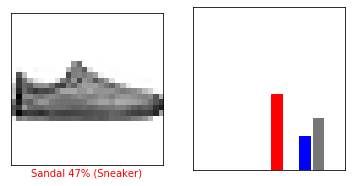

In [20]:
##
## Ejemplo para la imagen 12 del conjunto de test
##
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

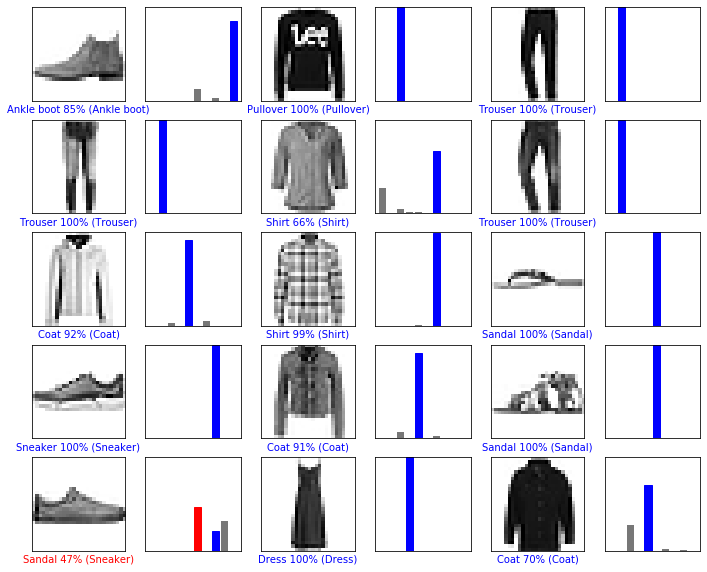

In [21]:
##
## Evaluación de las primeras 15 imagenes, etiqueta pronosticada y
## etiqueta verdadera. Etiqueta correcta en azul, equivocada en rojo.
##
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

### Pronóstico para imágenes individuales

In [22]:
##
## Imagen a ser pronosticada
##
img = test_images[0]
img.shape              # tamaño

(28, 28)

In [23]:
## 
## Keras está optimizado para generar pronósticos 
## sobre colecciones, por lo que debe crearse una 
## colección de una sola figura
##
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [24]:
predictions_single = model.predict(img)

print(predictions_single, '\n', np.argmax(predictions_single))

[[5.63241611e-06 4.64350080e-07 8.01351143e-06 2.80849179e-07
  1.03667735e-05 1.23891369e-01 2.48278629e-05 2.67038699e-02
  4.60173715e-06 8.49350631e-01]] 
 9


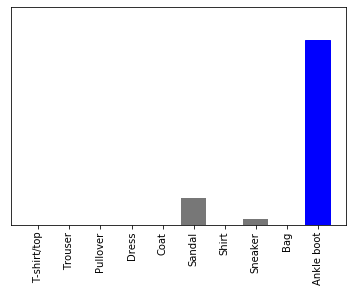

In [25]:
plot_value_array(0, predictions_single, test_labels)

plt.xticks(
    range(10), 
    class_names, 
    rotation=90);